In [151]:
import numpy as np
import pandas as pd
import re
import datetime as dt

In [33]:
Attempts = pd.read_excel('uefa.com/Attempts.xlsx')
Defending = pd.read_excel('uefa.com/Defending.xlsx').drop(columns=['Country'], inplace=False, axis=1)
Distribution = pd.read_excel('uefa.com/Distribution.xlsx').drop(columns=['Country'], inplace=False, axis=1)
Goalkeeping = pd.read_excel('uefa.com/Goalkeeping.xlsx').drop(columns=['Country'], inplace=False, axis=1)
Goals = pd.read_excel('uefa.com/Goals.xlsx').drop(columns=['Country'], inplace=False, axis=1)
#TODO: get and clean other stats from uefa site
#Attacking = pd.read_excel('uefa.com/Attacking.xlsx')
#Disciplinary = pd.read_excel('uefa.com/Disciplinary.xlsx')
uefa_stats = Attempts.merge(Defending, on='Team').merge(Distribution,on='Team').merge(Goalkeeping, on='Team').merge(Goals, on='Team')

In [34]:

uefa_stats.to_csv('uefa.com/uefa_stats.csv',index=False)
uefa_stats.head()

,Team,Country,Total Attempts,Attempts On Target,Attempts Off Target,Blocked,Balls Recovered,Tackles,Tackles Won,Tackles lost,...,Punches made,GP,Goals,Right Foot,Left Foot,Head,Other,Goals inside Area,Goals outside Area,Penalties Scored
0,Bayern München,Germany,184,70,59,55,336,123,55,68,...,1,8,20,7,7,6,0,19,1,4
1,Man City,England,149,55,43,51,264,75,31,44,...,3,8,18,8,7,1,0,14,3,2
2,Paris,France,149,49,57,43,352,111,46,65,...,4,8,14,9,2,2,0,12,1,0
3,PSV,Netherlands,141,57,47,37,331,144,53,91,...,3,8,16,9,4,2,0,10,5,0
4,Stuttgart,Germany,141,47,48,46,344,129,56,73,...,1,8,13,7,3,2,0,10,2,0


/Users/niko/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 8.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/niko/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 8.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/niko/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 8.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='Total Attempts', ylabel='Total Attempts'>,
        <AxesSubplot:xlabel='Attempts On Target', ylabel='Total Attempts'>,
        <AxesSubplot:xlabel='Attempts Off Target', ylabel='Total Attempts'>,
        ...,
        <AxesSubplot:xlabel='Goals inside Area', ylabel='Total Attempts'>,
        <AxesSubplot:xlabel='Goals outside Area', ylabel='Total Attempts'>,
        <AxesSubplot:xlabel='Penalties Scored', ylabel='Total Attempts'>],
       [<AxesSubplot:xlabel='Total Attempts', ylabel='Attempts On Target'>,
        <AxesSubplot:xlabel='Attempts On Target', ylabel='Attempts On Target'>,
        <AxesSubplot:xlabel='Attempts Off Target', ylabel='Attempts On Target'>,
        ...,
        <AxesSubplot:xlabel='Goals inside Area', ylabel='Attempts On Target'>,
        <AxesSubplot:xlabel='Goals outside Area', ylabel='Attempts On Target'>,
        <AxesSubplot:xlabel='Penalties Scored', ylabel='Attempts On Target'>],
       [<AxesSubplot:xlabel='Total Attempts', yl

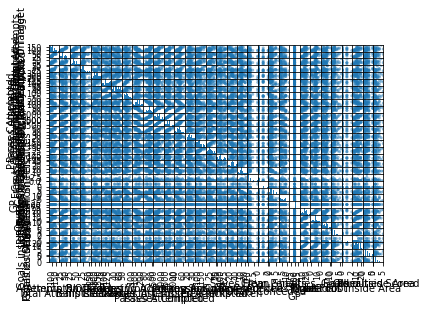

In [33]:
table_dict = {
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[]
}

with open('TeamStats.csv') as raw:
    i=0
    for line in raw:
        table_dict[i%8].append(int(line.strip('\n')))
        i += 1

table = pd.DataFrame.from_dict(table_dict)
table.rename(columns={0:'GP',1:'W',2:'D',3:'L',4:'F',5:'A',6:'GD',7:'P'}, inplace=True)

teams = pd.read_csv('Teams.csv')
table = teams.join(table)
table.to_csv('table.csv', index=False)

In [187]:
def extract_components(match_string):
        # Pattern explanation:
        # ([\d/]+):        - Captures the date (19/09)
        # \s*              - Any whitespace
        # (.+?)            - Captures team name (non-greedy)
        # \s+              - Whitespace
        # (\d+)-(\d+)      - Captures scores
        # \s+              - Whitespace
        # (.+)             - Captures away team name
        pattern = r'([\d]+)/([\d]+):\s*(.+?)\s+(\d+)-(\d+)\s+(.+)'

        match = re.match(pattern, match_string)
        if match:
            d = int(match.group(1))
            m = int(match.group(2))
            y = 2024 if m >=9 else 2025
            return (
                f'{d}/{m}/{y}',
                match.group(3).strip(),
                int(match.group(4)),
                int(match.group(5)),
                match.group(6).strip()
            )
        print(match_string)
        return None

In [192]:
results_with_dupes = pd.read_csv('other/results(withdupes).txt', header=None)
results = results_with_dupes.drop_duplicates(inplace=False)
results = results[0].apply(extract_components).tolist()
results = pd.DataFrame.from_records(results, columns=['date','home','HG','AG','away'])
results['date'] = pd.to_datetime(results['date'], format='%d/%m/%Y')
results.to_csv('other/results.csv', index=False)

In [193]:
results

,date,home,HG,AG,away
0,2024-09-19,Atalanta,0,0,Arsenal
1,2024-10-01,Arsenal,2,0,Paris Saint-Germain
2,2024-10-22,Arsenal,1,0,Shakhtar Donetsk
3,2024-11-06,Inter,1,0,Arsenal
4,2024-11-26,Sporting CP,1,5,Arsenal
...,...,...,...,...,...
143,2024-11-06,Shakhtar Donetsk,2,1,Young Boys
144,2025-01-21,Slovan Bratislava,1,3,Stuttgart
145,2024-10-01,Stuttgart,1,1,Sparta Praha
146,2024-10-22,Sturm Graz,0,2,Sporting CP
